In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
font_dir = ['C:/python/fonts']
for font in mpl.font_manager.findSystemFonts(fontpaths=font_dir):
    mpl.font_manager.fontManager.addfont(font)
    # print(mpl.font_manager.FontProperties(fname=font).get_name())

In [3]:
mpl.rcParams['font.family'] = 'NanumBarunGothicOTF'
print(mpl.rcParams['font.family'])

['NanumBarunGothicOTF']


In [4]:
mpl.rc('axes', unicode_minus=False)

In [5]:
%matplotlib inline

# folium 지도 기반의 시각화

- folium은 파이썬의 라이브러리로 지도 데이터를 시각화하는데 아주 쉽게 도와줌
- leaflet.js를 기반으로 만들어짐
- 지도에 마커를 표현하거나 범위를 나타내는 다양한 도형을 입력

In [6]:
import folium

In [7]:
# 현재 위치한 곳의 위도와 경도 정보

latitude, longtitude = (37.497361, 126.927653)

In [8]:
# 지도에 표시

m = folium.Map(location=[latitude, longtitude], 
               zoom_start=17,
               width=750,
               height=500
              )

popup_tag = """
<div style='width:100px'>
  <a href="https://playdata.io/"">
    플레이데이터
  </a>
</div>
"""
  
folium.Marker([latitude, longtitude],
               popup=popup_tag,
               tooltip="플레이데이터").add_to(m)
m

## Stack Overflow Annual Developer Survey

In [9]:
import requests
import json

In [10]:
survey_raw_df = pd.read_csv('C:/python/datas/survey_results_public.csv', index_col='ResponseId')

In [11]:
countries_geojson = "https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json"
response = requests.get(countries_geojson)
data_json = response.json()

In [12]:
country_counts = survey_raw_df.Country.value_counts()
country_counts_df = pd.DataFrame({'Country': country_counts.index,
                                  'Count': country_counts.values})
country_counts_df

,Country,Count
0,United States of America,13543
1,India,6639
2,Germany,5395
3,United Kingdom of Great Britain and Northern I...,4190
4,Canada,2490
...,...,...
175,Monaco,1
176,Djibouti,1
177,Seychelles,1
178,Solomon Islands,1


In [13]:
country_name = [feature['properties']['name'] for feature in data_json['features']]

In [14]:
# json 속성 feature.properties.name의 값과 우리가 csv에서 가져온 country name이 일치해야함

country_counts_df.at[12, 'Country']

'Russian Federation'

In [15]:
# 국가명 바꿔주기

rename_data = {
    'Republic of Korea': 'South Korea',
    'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
    'Viet Nam': 'Vietnam',
    'Russian Federation': 'Russia',
}
country_counts_df.replace(rename_data)

,Country,Count
0,United States of America,13543
1,India,6639
2,Germany,5395
3,United Kingdom,4190
4,Canada,2490
...,...,...
175,Monaco,1
176,Djibouti,1
177,Seychelles,1
178,Solomon Islands,1


In [16]:
country_counts_df.loc[country_counts_df.Country==rename_data.values()]

,Country,Count


In [17]:
m = folium.Map(location=[30, 0], zoom_start=2)

folium.Choropleth(
    geo_data=countries_geojson,
    data=country_counts_df,         # 만든 데이터
    columns=['Country', 'Count'],   # 컬럼
    key_on='feature.properties.name',
    threshold_scale=[1, 30, 100, 300, 1_000, 3_000, 10_000, 14_000],  # 범위(상단바)
    fill_color='YlGn',              # 색
    fill_opacity=0.7,               # 면적 투명도
    line_opacity=0.2,               # 선 투명도
    legend_name='Respondents',      # 범례
).add_to(m)

folium.LayerControl().add_to(m)

m

In [18]:
m.save("C:/python/datas/country.html")   # 지도 결과 저장하기

## 서울시 행정구역

In [19]:
seoul_geojson = "https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json"

m = folium.Map(location = [37.57, 126.99], zoom_start = 11)
folium.Choropleth(geo_data = seoul_geojson,
                  fill_color = "#22AA44",
                  fill_opacity = 0.4,
                  line_opacity = 1
).add_to(m)
m

# WordCloud

In [20]:
from wordcloud import WordCloud

In [25]:
survey_df = pd.read_csv('C:/python/datas/survey_results_public.csv',
                            index_col='ResponseId')

In [26]:
survey_df.DevType

ResponseId
1                                                      NaN
2                                                      NaN
3        Data scientist or machine learning specialist;...
4                                    Developer, full-stack
5        Developer, front-end;Developer, full-stack;Dev...
                               ...                        
73264                                  Developer, back-end
73265        Data scientist or machine learning specialist
73266    Developer, full-stack;Developer, desktop or en...
73267    Developer, front-end;Developer, desktop or ent...
73268    Developer, front-end;Engineer, data;Engineer, ...
Name: DevType, Length: 73268, dtype: object

In [27]:
survey_df.DevType

ResponseId
1                                                      NaN
2                                                      NaN
3        Data scientist or machine learning specialist;...
4                                    Developer, full-stack
5        Developer, front-end;Developer, full-stack;Dev...
                               ...                        
73264                                  Developer, back-end
73265        Data scientist or machine learning specialist
73266    Developer, full-stack;Developer, desktop or en...
73267    Developer, front-end;Developer, desktop or ent...
73268    Developer, front-end;Engineer, data;Engineer, ...
Name: DevType, Length: 73268, dtype: object

In [29]:
# DevType에 있는 모든 NaN값을 제거
temp_words = survey_df.DevType.dropna()
temp_words

ResponseId
3        Data scientist or machine learning specialist;...
4                                    Developer, full-stack
5        Developer, front-end;Developer, full-stack;Dev...
8                            Developer, full-stack;Student
9                                      Developer, back-end
                               ...                        
73264                                  Developer, back-end
73265        Data scientist or machine learning specialist
73266    Developer, full-stack;Developer, desktop or en...
73267    Developer, front-end;Developer, desktop or ent...
73268    Developer, front-end;Engineer, data;Engineer, ...
Name: DevType, Length: 61302, dtype: object

In [31]:
# 데이터 가공하기
temp_words = temp_words.str.replace(';', ' ').str.replace(',', ' ')
temp_words

ResponseId
3        Data scientist or machine learning specialist ...
4                                    Developer  full-stack
5        Developer  front-end Developer  full-stack Dev...
8                            Developer  full-stack Student
9                                      Developer  back-end
                               ...                        
73264                                  Developer  back-end
73265        Data scientist or machine learning specialist
73266    Developer  full-stack Developer  desktop or en...
73267    Developer  front-end Developer  desktop or ent...
73268    Developer  front-end Engineer  data Engineer  ...
Name: DevType, Length: 61302, dtype: object

In [33]:
# 문자열 값을 갖는 Series 내의 값을 단 하나의 문자열로 만들기
# words라는 변수에 Series에 있는 모든 단어를 공백이란 구분자를 통해 단 하나의 문자열로 합치기

words = ' '.join(temp_words)

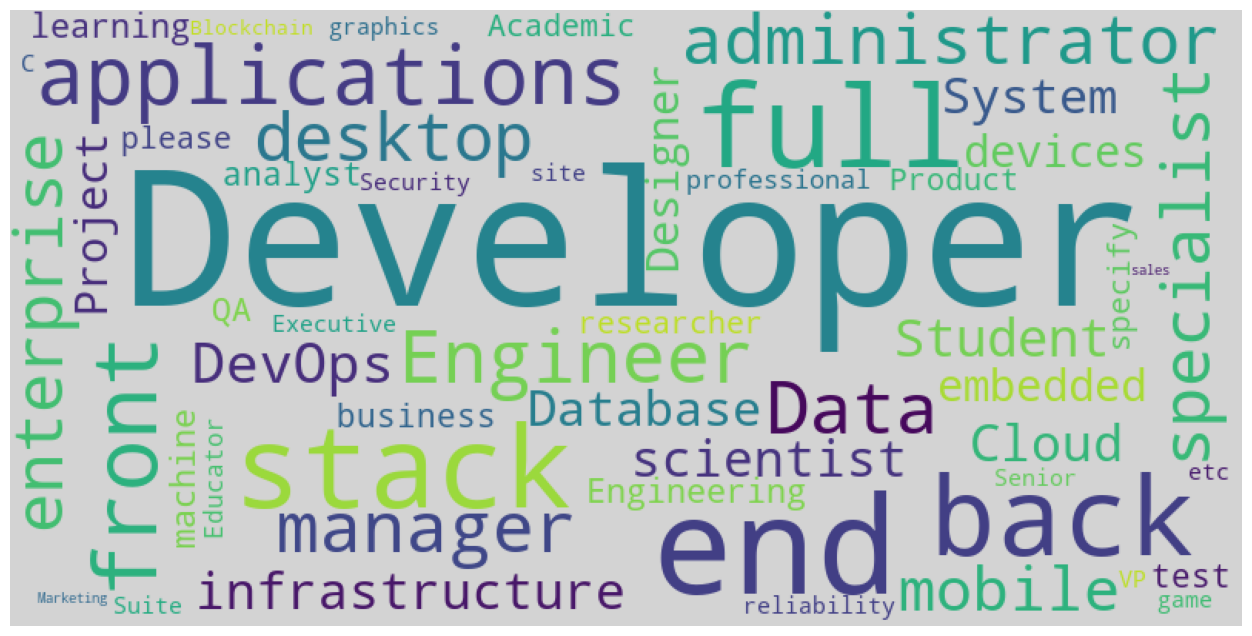

In [35]:
# 한글이 포함되었다면 한글 폰트를 지정해야 한다.
# font_path = ['폰트 경로']
# max_font_size = 60 --> 최대 글자 크기를 지정한다.
wc = WordCloud(collocation_threshold=int(1e6),
               width=800, height=400, 
               background_color='lightgrey').generate(words)
plt.figure(figsize=(16,8))

# x, y축을 그리지 않습니다.
plt.axis('off')

# grid lines를 그리지 않습니다.
plt.grid(False)
plt.imshow(wc)
plt.show()

In [37]:
wc.to_file('C:/python/datas/DevType.png')    # 그림 저장하기